#**Diagnóstico médico de Covid-19 basado en redes neuronales artificiales**

**Resumen:** La presente investigación se enfoca en la detección del Covid-19 mediante redes neuronales artificiales, con el fin de colaborar y apoyar en el diagnóstico médico, y facilitar en la detección del Covid-19 para evitar el aumento de la cifra de infectados mediante ello.

 ![texto alternativo](https://drive.google.com/uc?export=view&id=1cS-b-LlCHT3E3MvlNpb2DhkWgab5AcpK)

#**Metodología KDD PROCESS**

##**Selección de datos**

In [ ]:
import pandas as pd
import numpy as np
import missingno as ms
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers, callbacks

In [ ]:
#importar el dataset
datasetcovid = pd.read_csv("https://raw.githubusercontent.com/SergioGerman412/Datasets/main/datasetcovid2.csv")
datasetcovid.head(2)

,dificultad para respirar,dolor en el pecho,dificultad para moverse,fiebre,tos,fatiga,pérdida del olfato,pérdida del gusto,náuseas,diarrea,dolor de garganta,dolor de cabeza,dolor muscular,conjuntivitis,erupción cutánea,diagnóstico
0,1,0,1,1,1,1,1,0,0,0,1,1,1,0,0,1
1,1,0,1,1,0,1,1,1,0,1,1,1,1,0,0,1


In [ ]:
datasetcovid.describe()

,dificultad para respirar,dolor en el pecho,dificultad para moverse,fiebre,tos,fatiga,pérdida del olfato,pérdida del gusto,náuseas,diarrea,dolor de garganta,dolor de cabeza,dolor muscular,conjuntivitis,erupción cutánea,diagnóstico
count,500.000000,500.000000,500.00000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000
mean,0.616000,0.452000,0.34600,0.678000,0.77600,0.884000,0.302000,0.288000,0.210000,0.412000,0.322000,0.808000,0.796000,0.010000,0.016000,0.92200
std,0.486845,0.498189,0.47617,0.467711,0.41734,0.320546,0.459585,0.453285,0.407716,0.492688,0.467711,0.394268,0.403373,0.099598,0.125601,0.26844
min,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.00000,0.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.00000
50%,1.000000,0.000000,0.00000,1.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.00000
75%,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.00000
max,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


*Interpretación*

- No existe la presencia de datos nulos en base a "count"
- El min y max esta entre 0 y 1, por lo que se determina que las variables estan en binarios

In [ ]:
print('La cantidad de filas de de mi dataset es:',len(datasetcovid.index))

La cantidad de filas de de mi dataset es: 500


In [ ]:
list(datasetcovid.columns)

['dificultad para respirar',
 'dolor en el pecho',
 'dificultad para moverse',
 'fiebre',
 'tos',
 'fatiga',
 'pérdida del olfato',
 'pérdida del gusto',
 'náuseas',
 'diarrea',
 'dolor de garganta',
 'dolor de cabeza',
 'dolor muscular',
 'conjuntivitis',
 'erupción cutánea',
 'diagnóstico']

<Axes: xlabel='fiebre', ylabel='count'>

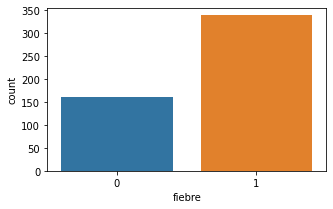

In [ ]:
plt.figure(figsize=(5,3))
sns.countplot(x = 'fiebre', data = datasetcovid)

##**Pre Procesamiento de datos**

**verificar datos nulos**

<Axes: >

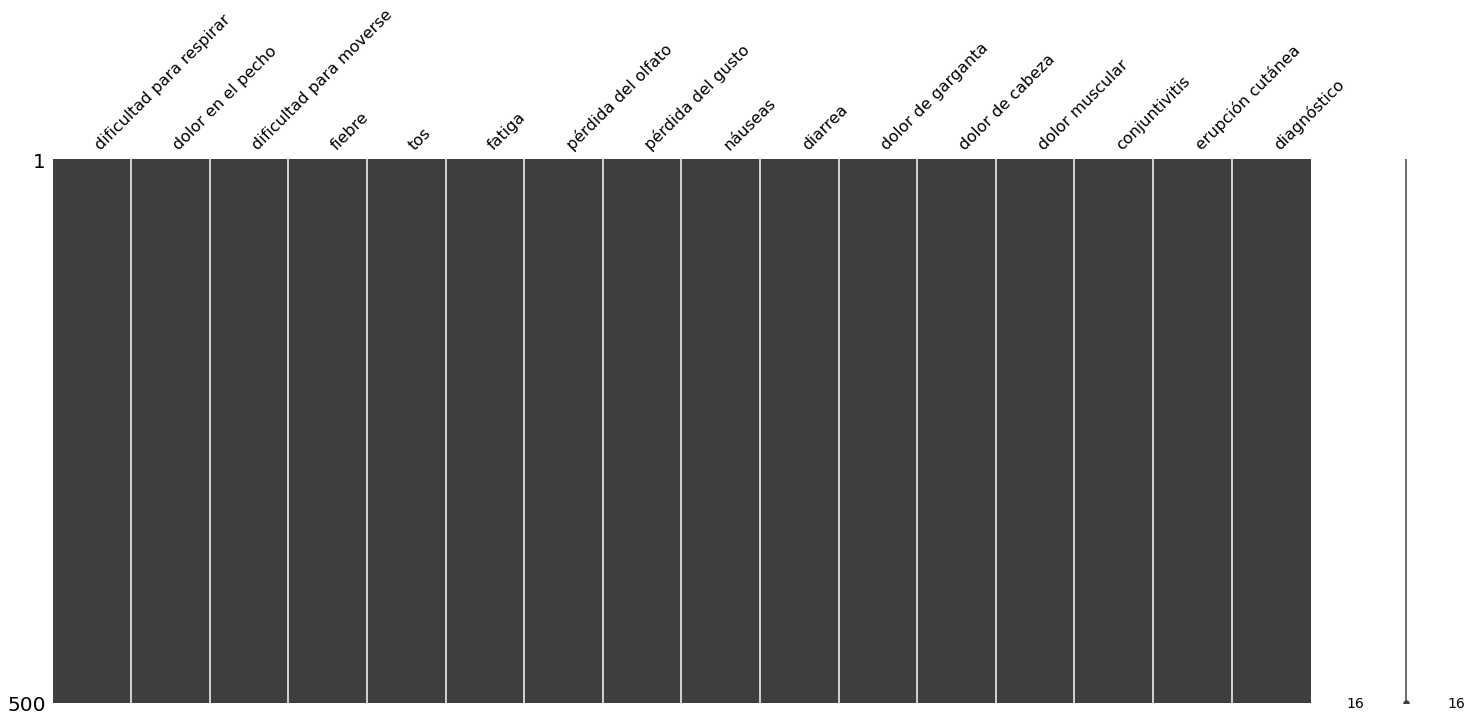

In [ ]:
#utilizando la librería missigno verificamos los datos nulos en el dataset
ms.matrix(datasetcovid)

In [ ]:
datasetcovid.isna().sum()

dificultad para respirar    0
dolor en el pecho           0
dificultad para moverse     0
fiebre                      0
tos                         0
fatiga                      0
pérdida del olfato          0
pérdida del gusto           0
náuseas                     0
diarrea                     0
dolor de garganta           0
dolor de cabeza             0
dolor muscular              0
conjuntivitis               0
erupción cutánea            0
diagnóstico                 0
dtype: int64

**Verificar las influencias de las variables con el target**

<Axes: xlabel='diagnóstico'>

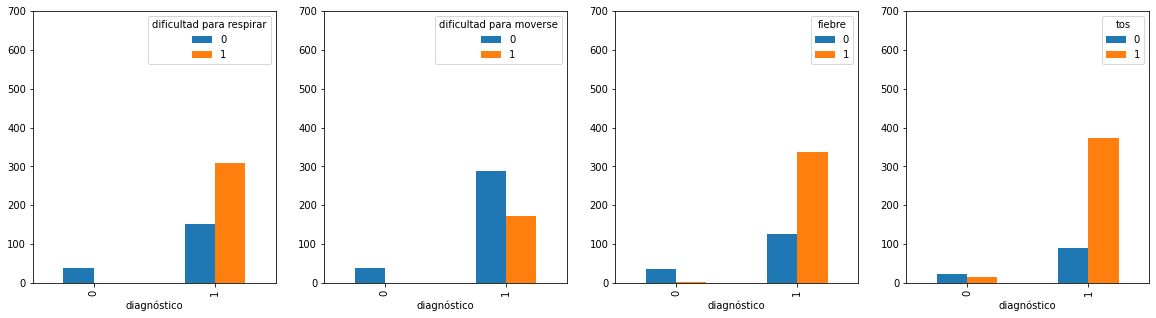

In [ ]:
#revisando las influencias de mis variables

fig,(ax1, ax2, ax3, ax4)=plt.subplots(ncols=4,figsize=(20,5))
pd.crosstab(datasetcovid['diagnóstico'],datasetcovid['dificultad para respirar']).plot(kind='bar',ax=ax1, ylim=[0,700])
pd.crosstab(datasetcovid['diagnóstico'],datasetcovid['dificultad para moverse']).plot(kind='bar',ax=ax2, ylim=[0,700])
pd.crosstab(datasetcovid['diagnóstico'],datasetcovid['fiebre']).plot(kind='bar',ax=ax3, ylim=[0,700])
pd.crosstab(datasetcovid['diagnóstico'],datasetcovid['tos']).plot(kind='bar',ax=ax4, ylim=[0,700])

**verificar outliers**

**outliers:** o también conocidos como **atípicos**, son datos que no se comportan al igual que el resto. En palabras más sencillas un outlier sería una observación dentro de una muestra que no es consistente con el resto.

In [ ]:
boxplot1 = datasetcovid.iloc[:, 0:3]

<Figure size 864x1152 with 0 Axes>

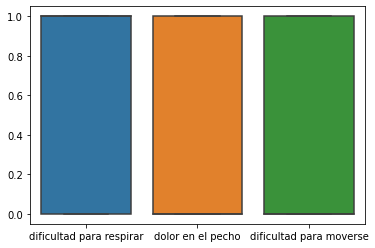

<Figure size 864x1152 with 0 Axes>

In [ ]:
sns.boxplot(data=boxplot1)
plt.figure(figsize=(12,16))

**Análisis univariante**

In [ ]:
datasetcovid['dificultad para respirar'].unique()

array([1, 0])

In [ ]:
datasetcovid['dolor en el pecho'].unique()

array([0, 1])

In [ ]:
datasetcovid['dificultad para moverse'].unique()

array([1, 0])

In [ ]:
datasetcovid['fiebre'].unique()

array([1, 0])

In [ ]:
datasetcovid['tos'].unique()

array([1, 0])

##**Transformación**

In [ ]:
#definir x Y del entrenamiento
y = datasetcovid.diagnóstico

X = datasetcovid.drop('diagnóstico',axis=1)

In [ ]:
#dividir el dataset
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2, random_state=8)


##**Minería de datos**

### Perceptrón Multicapa

In [ ]:
#early stopping para evitar el overfitting

early_stopping = callbacks.EarlyStopping(
    min_delta=0.01,   #cantidad mínima de cambio para contar como una mejora
    patience=30,      #cuantas epocas esperar para detener el entrenamiento
    restore_best_weights=True,
    )


In [ ]:
#crear red neuronal artificial
model = keras.Sequential([
    
#crear capa de entrada
    layers.Dense(units=1, activation = 'relu', input_shape=[15]),
 
#crear capa oculta
     layers.Dense(units=1, activation = 'relu'),
     
#crear capa de salida

     layers.Dense(units=1, activation='sigmoid'),

   ])

In [ ]:
#definir optimizador, función de pérdida y métricas

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics=['binary_accuracy'],
    )

In [ ]:
#definir tamaño de lote, épocas, etc.
history = model.fit(
        train_X, train_y,
        validation_data=(val_X, val_y),
        batch_size=10,
        epochs=200,
        callbacks=[early_stopping]
        )

Epoch 1/200
40/40 [==============================] - 2s 21ms/step - loss: 0.6776 - binary_accuracy: 0.9025 - val_loss: 0.6595 - val_binary_accuracy: 0.9400
Epoch 2/200
40/40 [==============================] - 0s 8ms/step - loss: 0.6443 - binary_accuracy: 0.9175 - val_loss: 0.6185 - val_binary_accuracy: 0.9400
Epoch 3/200
40/40 [==============================] - 0s 9ms/step - loss: 0.5978 - binary_accuracy: 0.9175 - val_loss: 0.5560 - val_binary_accuracy: 0.9400
Epoch 4/200
40/40 [==============================] - 0s 11ms/step - loss: 0.5266 - binary_accuracy: 0.9175 - val_loss: 0.4640 - val_binary_accuracy: 0.9400
Epoch 5/200
40/40 [==============================] - 0s 8ms/step - loss: 0.4369 - binary_accuracy: 0.9175 - val_loss: 0.3694 - val_binary_accuracy: 0.9400
Epoch 6/200
40/40 [==============================] - 1s 14ms/step - loss: 0.3540 - binary_accuracy: 0.9175 - val_loss: 0.2881 - val_binary_accuracy: 0.9400
Epoch 7/200
40/40 [==============================] - 0s 8ms/step - 

In [ ]:
#definir y_pred
y_pred = model.predict(val_X)
y_pred

4/4 [==============================] - 0s 5ms/step


array([[0.9999962 ],
       [0.9999973 ],
       [0.99965596],
       [0.9999999 ],
       [0.99999577],
       [0.9999404 ],
       [0.9999856 ],
       [0.9999924 ],
       [0.9873654 ],
       [0.99599874],
       [0.99999934],
       [0.9998209 ],
       [0.9998251 ],
       [0.32517707],
       [0.9999997 ],
       [0.99985635],
       [0.99998975],
       [0.99997973],
       [0.9999404 ],
       [0.9999966 ],
       [0.99985325],
       [0.9999964 ],
       [0.99999255],
       [0.32517707],
       [1.        ],
       [0.9912813 ],
       [0.99994457],
       [0.9999994 ],
       [0.99886155],
       [0.9999997 ],
       [0.9961287 ],
       [0.99999523],
       [0.9996929 ],
       [0.9998454 ],
       [0.9992855 ],
       [0.9999936 ],
       [0.96190804],
       [0.9980822 ],
       [0.99999976],
       [0.9999909 ],
       [0.9999047 ],
       [0.9996463 ],
       [0.9998997 ],
       [0.982795  ],
       [0.999994  ],
       [0.9999315 ],
       [0.99999714],
       [0.986

In [ ]:
#transformar datos a binarios discretos
y_pred1 = list(map(lambda x:1 if x>0.5 else 0, y_pred))
y_pred1

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0]

##**Interpretación y evaluación**

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

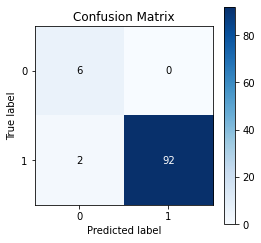

In [ ]:

!pip install -q scikit-plot
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(val_y, y_pred1, figsize=(4,4))


In [ ]:
from sklearn.metrics import accuracy_score
print('El accuracy para mi modelo es :{0:.2f}'.format(accuracy_score(val_y,y_pred1))) #usando la expresión regex .2f para mostrar 2 decimales

El accuracy para mi modelo es :0.98


In [ ]:
from sklearn.metrics import classification_report
rf_report = classification_report(val_y, y_pred1, target_names=['Clase A' , 'Clase B']) #Obtenemos las métricas de la matriz por Perceptrón Multicapa
print(rf_report)

              precision    recall  f1-score   support

     Clase A       0.75      1.00      0.86         6
     Clase B       1.00      0.98      0.99        94

    accuracy                           0.98       100
   macro avg       0.88      0.99      0.92       100
weighted avg       0.98      0.98      0.98       100



##** MODELO ADICIONAL: REGRESIÓN LOGÍSTICA**

In [ ]:
from sklearn.linear_model import LogisticRegression #Importamos la librería para aplicar Regresión Logística
rl = LogisticRegression(random_state=1) #creamos la variable rl para guardar el modelo con los parámetros deseados
rl.fit(train_X, train_y) #entrenamos con datos guardados en train_X y train_y
rl_pred = rl.predict(val_X) #generamos las predicciones usando como variables predictoras los datos en val_X
rl_pred #mostramos las predicciones guardadas en la variable rl_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

*Probabilidades de la predicción sobre el target*

In [ ]:
#Calculamos la probabilidades de obtener 1 con el método predict_proba
rl_prob = rl.predict_proba(val_X)[:, 1]
rl_prob

array([0.99979422, 0.99983443, 0.99316522, 0.99997624, 0.99918936,
       0.99866697, 0.99912158, 0.99969607, 0.93795582, 0.95522345,
       0.99991176, 0.9935881 , 0.99573181, 0.27168891, 0.99992831,
       0.99610426, 0.99964948, 0.99894553, 0.99866697, 0.99978746,
       0.99545452, 0.99980904, 0.99971908, 0.097016  , 0.99999445,
       0.96021441, 0.99891739, 0.99979975, 0.96529226, 0.99993061,
       0.98388699, 0.99973627, 0.99599553, 0.99852758, 0.99618265,
       0.99946187, 0.96074882, 0.99351402, 0.99994232, 0.99963797,
       0.99913147, 0.99757467, 0.99771599, 0.93990066, 0.9995006 ,
       0.99840607, 0.99993486, 0.91650496, 0.9994842 , 0.99411371,
       0.94082924, 0.98720642, 0.99469467, 0.99990174, 0.99921958,
       0.99952672, 0.50858949, 0.11679087, 0.99966403, 0.94616449,
       0.95800518, 0.99267192, 0.79475854, 0.9955499 , 0.99993486,
       0.99866697, 0.9997129 , 0.99536273, 0.99599121, 0.94647995,
       0.99815029, 0.9517845 , 0.99815702, 0.99420259, 0.99852

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

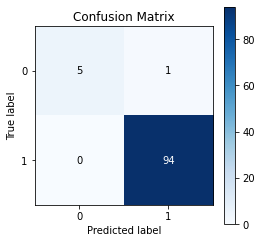

In [ ]:
"CELDA N°14"
!pip install -q scikit-plot #Instalamos en el presente notebook usando ! el paquete scikit-plot
import scikitplot as skplt #Importamos la librería skplt
skplt.metrics.plot_confusion_matrix(val_y,rl_pred, figsize=(4,4)) #Graficamos la matriz usando plot_confusion_matrix y los datos de val_y vs rl_pred

In [ ]:
#Calculamos el accuracy comparando las predicciones generadas versus val_y
print('El accuracy para mi segundo modelo es :{0:.2f}'.format(accuracy_score(val_y,rl_pred))) #usando la expresión regex .2f para mostrar 2 decimales

El accuracy para mi segundo modelo es :0.99


In [ ]:
rf_report = classification_report(val_y, rl_pred, target_names=['0' , '1']) #Obtenemos las métricas de la matriz por Regresión Logística
print(rf_report)

              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.99      1.00      0.99        94

    accuracy                           0.99       100
   macro avg       0.99      0.92      0.95       100
weighted avg       0.99      0.99      0.99       100

